# Autoregressive Moving Average (ARMA): Sunspots data

In [1]:
%matplotlib inline

from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [2]:
from statsmodels.graphics.api import qqplot

## Sunpots Data

In [3]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [4]:
dta = sm.datasets.sunspots.load_pandas().data

In [5]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

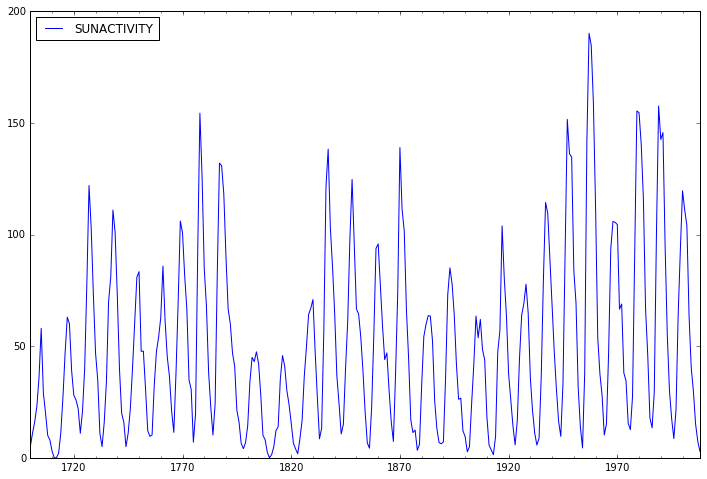

In [6]:
dta.plot(figsize=(12,8));

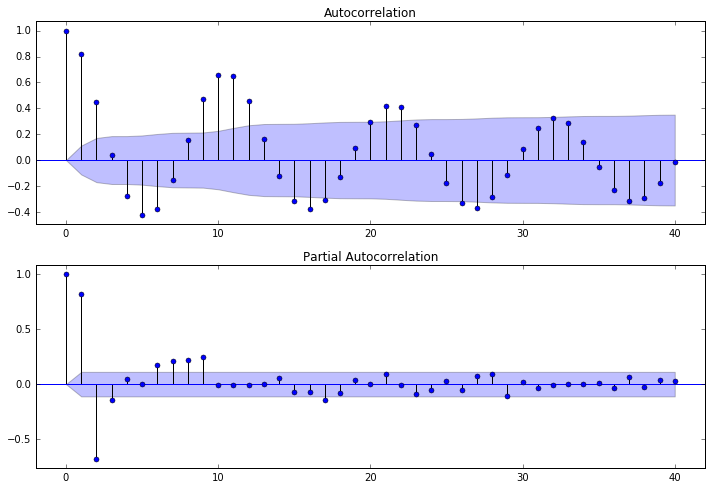

In [7]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [8]:
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit()
print(arma_mod20.params)

const                49.659555
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64


In [9]:
arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit()

In [10]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2622.63633807 2637.56970317 2628.60672591


In [11]:
print(arma_mod30.params)

const                49.750030
ar.L1.SUNACTIVITY     1.300810
ar.L2.SUNACTIVITY    -0.508093
ar.L3.SUNACTIVITY    -0.129649
dtype: float64


In [12]:
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

2619.4036287 2638.07033508 2626.8666135


* Does our model obey the theory?

In [13]:
sm.stats.durbin_watson(arma_mod30.resid.values)

1.9564805219302814

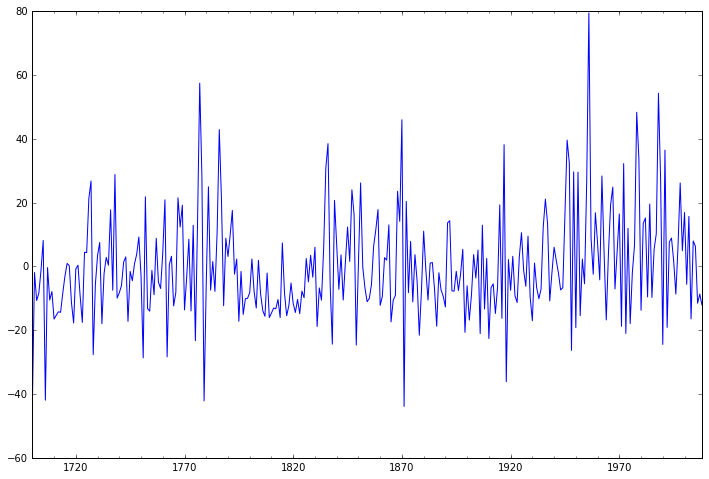

In [14]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

In [15]:
resid = arma_mod30.resid

In [16]:
stats.normaltest(resid)

NormaltestResult(statistic=49.8450291299756, pvalue=1.5006846809729493e-11)

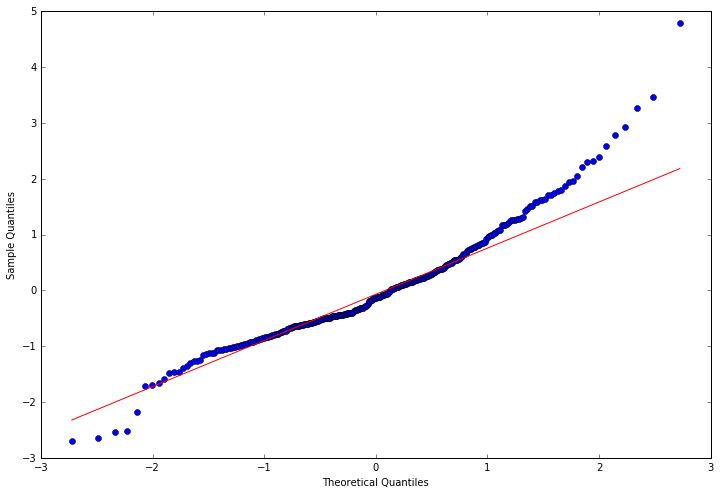

In [17]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

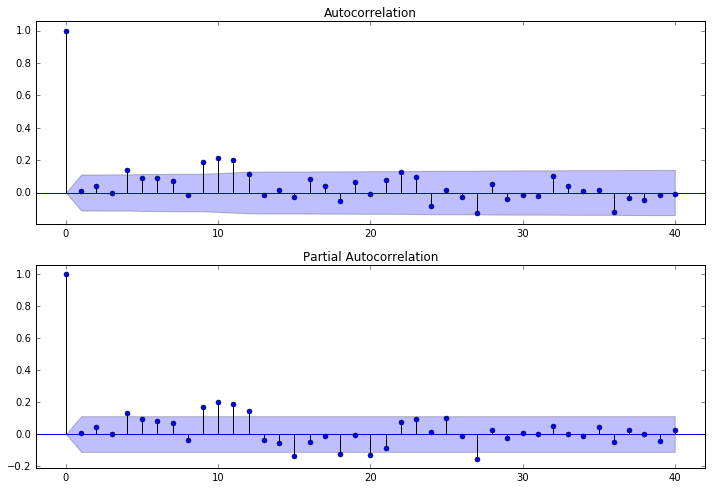

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [19]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

           AC          Q      Prob(>Q)
lag                                   
1    0.009179   0.026287  8.712013e-01
2    0.041793   0.573045  7.508700e-01
3   -0.001335   0.573605  9.024474e-01
4    0.136089   6.408917  1.706206e-01
5    0.092468   9.111817  1.046864e-01
6    0.091948  11.793228  6.674383e-02
7    0.068748  13.297183  6.519022e-02
8   -0.015020  13.369211  9.976189e-02
9    0.187592  24.641896  3.393926e-03
10   0.213718  39.321992  2.229477e-05
11   0.201082  52.361146  2.344941e-07
12   0.117182  56.804203  8.574207e-08
13  -0.014055  56.868339  1.893892e-07
14   0.015398  56.945578  3.997636e-07
15  -0.024967  57.149334  7.741424e-07
16   0.080916  59.296779  6.872138e-07
17   0.041138  59.853746  1.110941e-06
18  -0.052021  60.747436  1.548427e-06
19   0.062496  62.041700  1.831637e-06
20  -0.010301  62.076987  3.381232e-06
21   0.074453  63.926665  3.193573e-06
22   0.124955  69.154786  8.978304e-07
23   0.093162  72.071053  5.799744e-07
24  -0.082152  74.346704 

* This indicates a lack of fit.

* In-sample dynamic prediction. How good does our model do?

In [20]:
predict_sunspots = arma_mod30.predict('1990', '2012', dynamic=True)
print(predict_sunspots)

1990-12-31    167.047433
1991-12-31    140.993048
1992-12-31     94.859200
1993-12-31     46.861028
1994-12-31     11.242744
1995-12-31     -4.721121
1996-12-31     -1.166747
1997-12-31     16.185830
1998-12-31     39.021986
1999-12-31     59.449941
2000-12-31     72.170189
2001-12-31     75.376823
2002-12-31     70.436506
2003-12-31     60.731654
2004-12-31     50.201887
2005-12-31     42.076138
2006-12-31     38.114410
2007-12-31     38.454767
2008-12-31     41.963931
2009-12-31     46.869388
2010-12-31     51.423348
2011-12-31     54.399794
2012-12-31     55.321762
Freq: A-DEC, dtype: float64


C:\Users\AlexMerhoom\Anaconda2\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


C:\Users\AlexMerhoom\Anaconda2\lib\site-packages\statsmodels\tsa\arima_model.py:1724: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


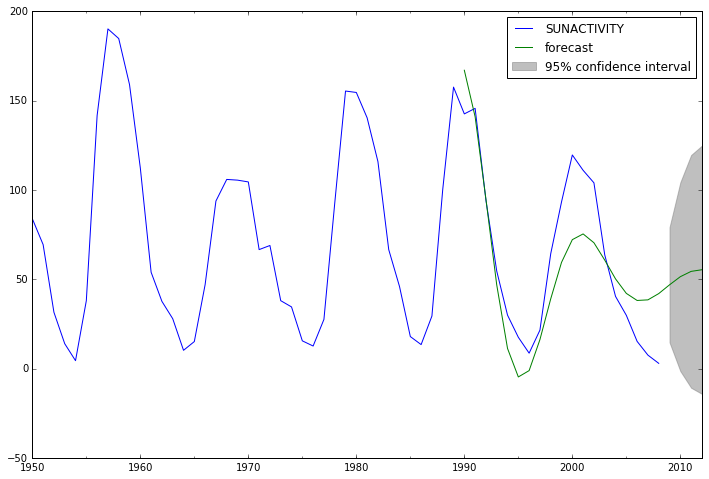

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['1950':].plot(ax=ax)
fig = arma_mod30.plot_predict('1990', '2012', dynamic=True, ax=ax, plot_insample=False)

In [22]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

In [23]:
mean_forecast_err(dta.SUNACTIVITY, predict_sunspots)

5.636860732387419

### Exercise: Can you obtain a better fit for the Sunspots model? (Hint: sm.tsa.AR has a method select_order)

### Simulated ARMA(4,1): Model Identification is Difficult

In [24]:
from statsmodels.tsa.arima_process import arma_generate_sample, ArmaProcess

In [25]:
np.random.seed(1234)
# include zero-th lag
arparams = np.array([1, .75, -.65, -.55, .9])
maparams = np.array([1, .65])

Let's make sure this model is estimable.

In [26]:
arma_t = ArmaProcess(arparams, maparams)

In [27]:
arma_t.isinvertible

True

In [28]:
arma_t.isstationary

False

* What does this mean?

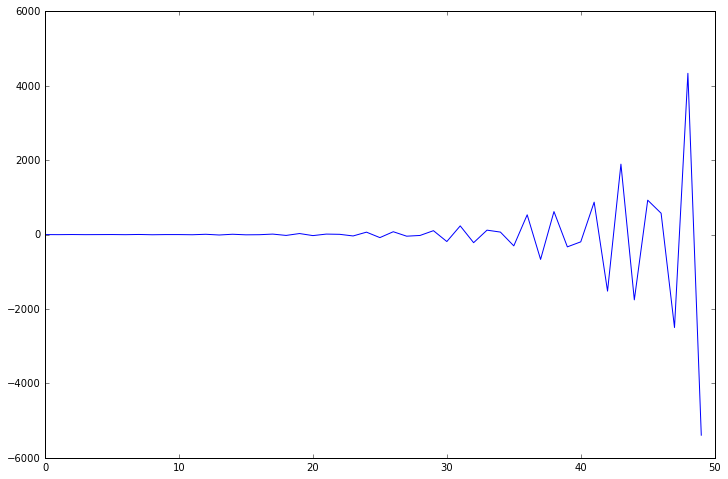

In [29]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(arma_t.generate_sample(nsample=50));

In [30]:
arparams = np.array([1, .35, -.15, .55, .1])
maparams = np.array([1, .65])
arma_t = ArmaProcess(arparams, maparams)
arma_t.isstationary

True

In [31]:
arma_rvs = arma_t.generate_sample(nsample=500, burnin=250, scale=2.5)

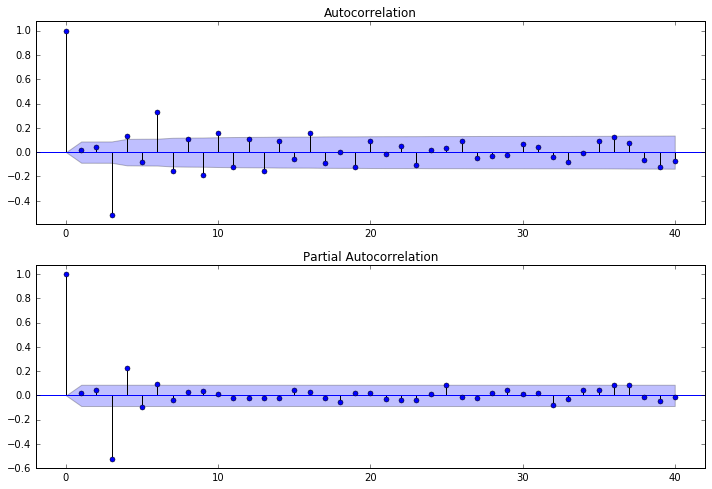

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_rvs, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_rvs, lags=40, ax=ax2)

* For mixed ARMA processes the Autocorrelation function is a mixture of exponentials and damped sine waves after (q-p) lags. 
* The partial autocorrelation function is a mixture of exponentials and dampened sine waves after (p-q) lags.

In [33]:
arma11 = sm.tsa.ARMA(arma_rvs, (1,1)).fit()
resid = arma11.resid
r,q,p = sm.tsa.acf(resid, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

           AC           Q      Prob(>Q)
lag                                    
1    0.254921   32.687660  1.082221e-08
2   -0.172416   47.670718  4.450769e-11
3   -0.420945  137.159374  1.548480e-29
4   -0.046875  138.271281  6.617770e-29
5    0.103240  143.675882  2.958758e-29
6    0.214864  167.132978  1.823737e-33
7   -0.000889  167.133380  1.009216e-32
8   -0.045418  168.185730  3.094868e-32
9   -0.061445  170.115782  5.837273e-32
10   0.034623  170.729835  1.958755e-31
11   0.006351  170.750536  8.267132e-31
12  -0.012882  170.835889  3.220263e-30
13  -0.053959  172.336528  6.181253e-30
14  -0.016606  172.478945  2.160235e-29
15   0.051742  173.864467  4.089585e-29
16   0.078917  177.094261  3.217966e-29
17  -0.001834  177.096008  1.093178e-28
18  -0.101604  182.471916  3.103853e-29
19  -0.057342  184.187751  4.624110e-29
20   0.026975  184.568265  1.235682e-28
21   0.062359  186.605941  1.530273e-28
22  -0.009400  186.652343  4.548238e-28
23  -0.068037  189.088163  4.562055e-28


In [34]:
arma41 = sm.tsa.ARMA(arma_rvs, (4,1)).fit()
resid = arma41.resid
r,q,p = sm.tsa.acf(resid, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

           AC          Q  Prob(>Q)
lag                               
1   -0.007888   0.031300  0.859572
2    0.004132   0.039905  0.980245
3    0.018103   0.205416  0.976710
4   -0.006760   0.228540  0.993948
5    0.018120   0.395026  0.995465
6    0.050688   1.700448  0.945087
7    0.010252   1.753955  0.972196
8   -0.011206   1.818018  0.986092
9    0.020292   2.028519  0.991009
10   0.001029   2.029061  0.996113
11  -0.014035   2.130169  0.997984
12  -0.023858   2.422927  0.998427
13  -0.002108   2.425217  0.999339
14  -0.018783   2.607430  0.999590
15   0.011316   2.673700  0.999805
16   0.042159   3.595420  0.999443
17   0.007943   3.628206  0.999734
18  -0.074311   6.503856  0.993686
19  -0.023379   6.789068  0.995256
20   0.002398   6.792074  0.997313
21   0.000487   6.792199  0.998516
22   0.017952   6.961436  0.999024
23  -0.038576   7.744467  0.998744
24  -0.029816   8.213250  0.998859
25   0.077850  11.415825  0.990675
26   0.040408  12.280449  0.989479
27  -0.018612  12.46

### Exercise: How good of in-sample prediction can you do for another series, say, CPI

In [35]:
macrodta = sm.datasets.macrodata.load_pandas().data
macrodta.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
cpi = macrodta["cpi"]

#### Hint: 

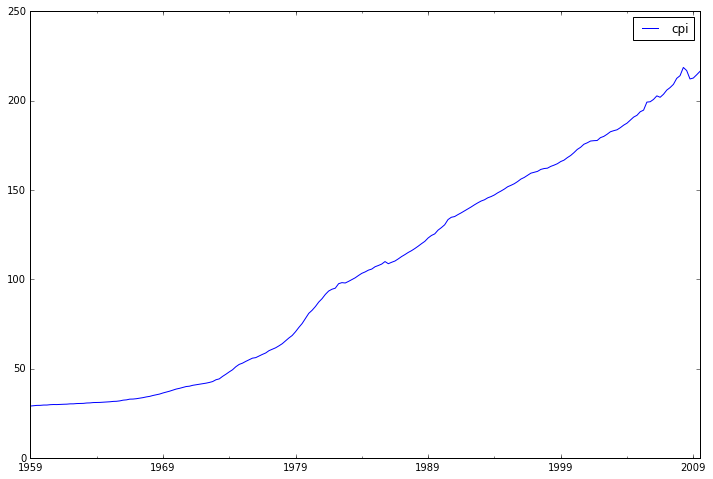

In [36]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = cpi.plot(ax=ax);
ax.legend();

P-value of the unit-root test, resoundly rejects the null of no unit-root.

In [37]:
print(sm.tsa.adfuller(cpi)[1])

0.990432818834
